In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",2024-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


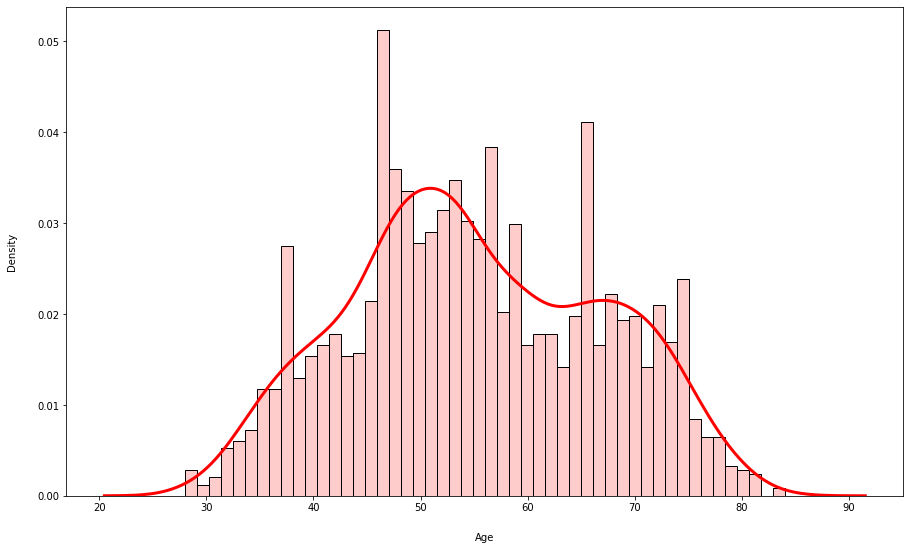

In [38]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Age, 
    bins=50, 
    stat='density',
    alpha=0.2,
    color = "red"
)

density_curve = sns.kdeplot(data.Age, linewidth=3, color="red")

plt.xlabel("Age", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [6]:
data = data[data.Age < 100]

In [7]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 55.082693176683236
Mediana: 54.0
Standard deviation: 11.70021612968385


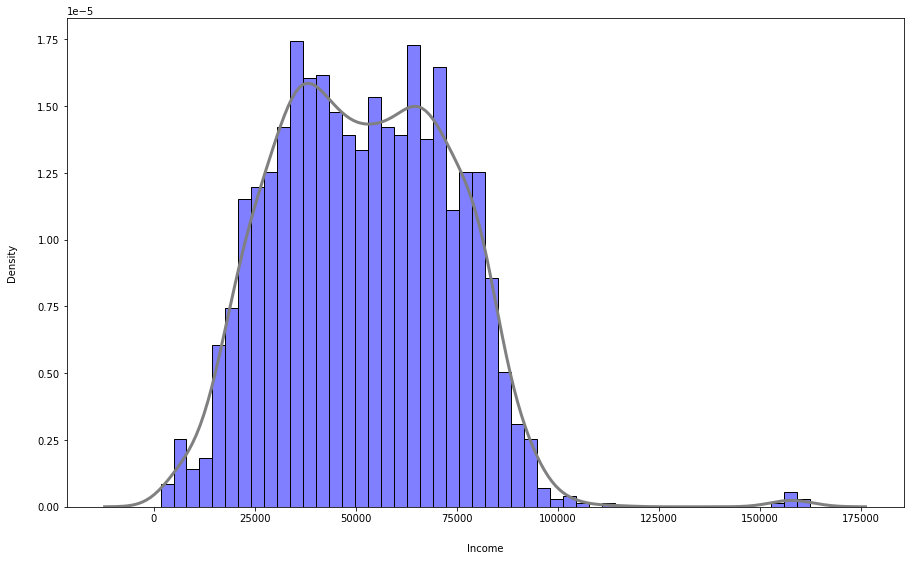

In [43]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Income, 
    bins=50, 
    stat='density',
    alpha=0.5,
    color = "blue"
)

density_curve = sns.kdeplot(data.Income, linewidth=3, color="grey")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [9]:
data = data[data.Income < 600000]

In [10]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050485


In [11]:
counts_edu = data.Education.value_counts()
print(counts_edu)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


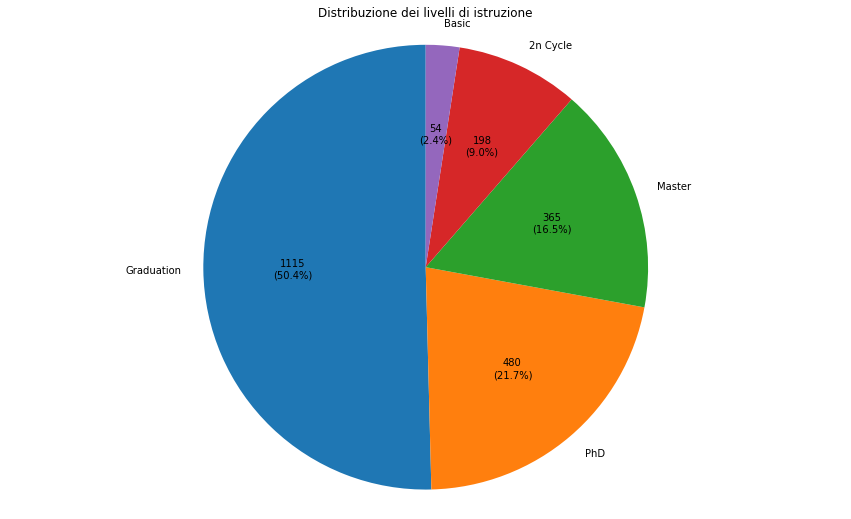

In [50]:
total = counts_edu.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_edu, labels=counts_edu.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione dei livelli di istruzione')
plt.show()

In [13]:
counts_status = data.Marital_Status.value_counts()
print(counts_status)

Marital_Status
Partner    1428
Alone       784
Name: count, dtype: int64


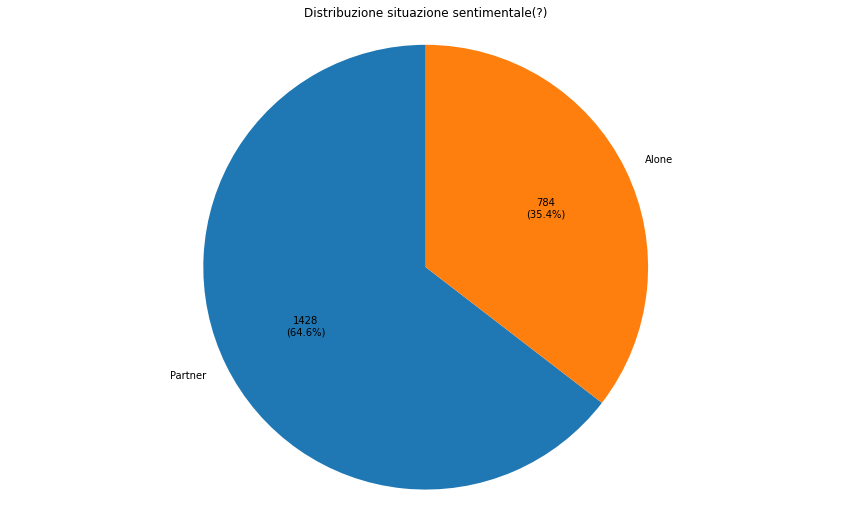

In [51]:
total = counts_status.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_status, labels=counts_status.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione situazione sentimentale(?)')
plt.show()

In [15]:
phd_data = data.loc[data.Education== 'PhD']
phd_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,39,PhD,Partner,33454.0,169,1,0,2013-05-08,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,50,PhD,Partner,30351.0,46,1,0,2013-06-06,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,74,PhD,Partner,5648.0,49,1,1,2014-03-13,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,78,PhD,Alone,82800.0,1315,0,0,2012-11-24,...,3,0,0,1,1,0,0,3,11,1


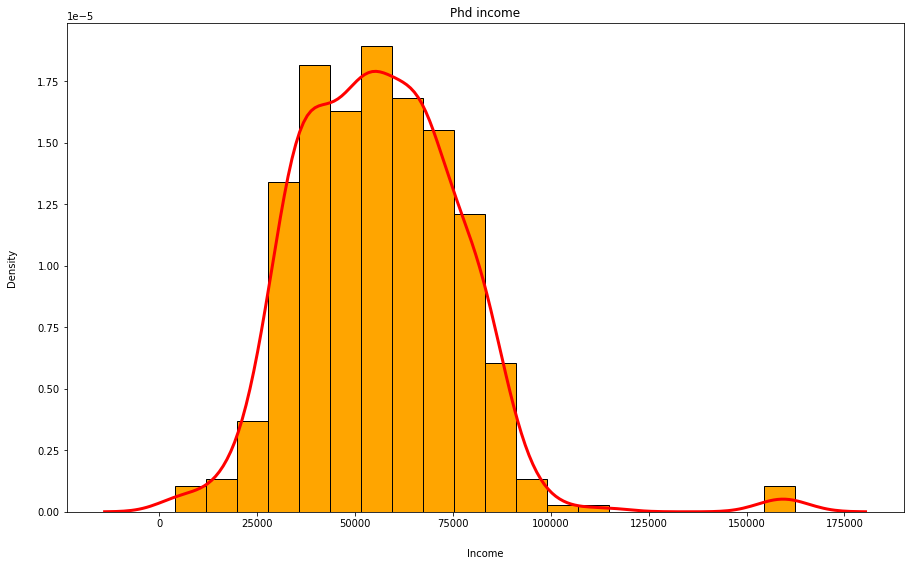

In [59]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    phd_data.Income, 
    bins=20, 
    stat='density',
    alpha=1,
    color = "orange"
)

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="red")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Phd income")
plt.show()

In [17]:
mean_income = phd_data.Income.mean()
median_income = phd_data.Income.median()
std_income = phd_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 56088.25833333333
Mediana: 55185.0
Standard deviation: 20596.42935560307


In [18]:
basic_data = data.loc[data.Education== 'Basic']
basic_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,48,Basic,Partner,7500.0,61,0,0,2012-11-13,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,45,Basic,Partner,24594.0,29,1,0,2013-12-10,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,48,Basic,Alone,9548.0,29,1,0,2012-08-08,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,63,Basic,Partner,28249.0,43,0,0,2014-06-15,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,46,Basic,Partner,24882.0,80,1,0,2012-09-09,...,6,1,0,0,0,0,0,3,11,0


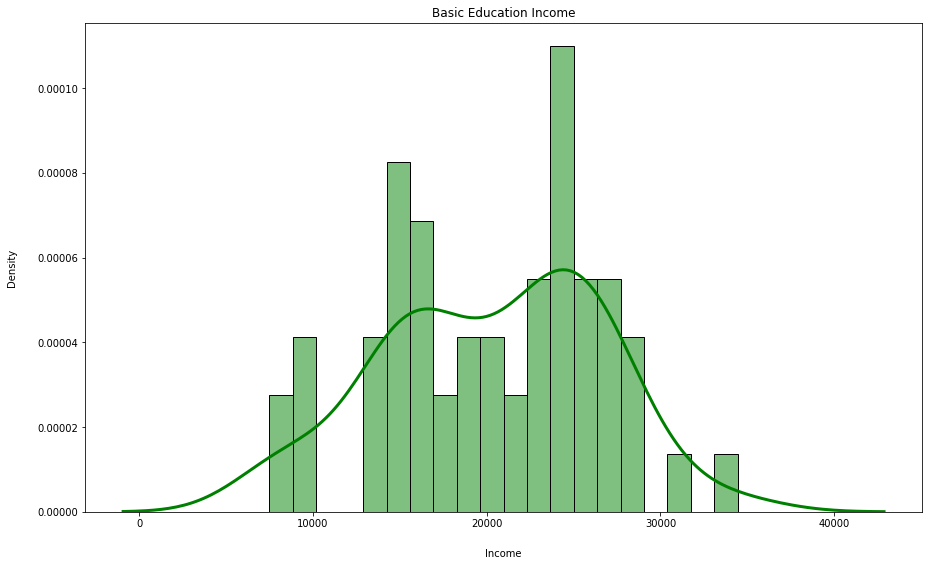

In [60]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    basic_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="green")

plt.title("Basic Education Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [20]:
mean_income = basic_data.Income.mean()
median_income = basic_data.Income.median()
std_income = basic_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 20306.25925925926
Mediana: 20744.0
Standard deviation: 6235.066773288437


In [21]:
graduation_data = data.loc[data.Education== 'Graduation']
graduation_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,53,Graduation,Alone,55635.0,590,0,1,2012-11-13,...,6,0,0,0,0,0,0,3,11,0


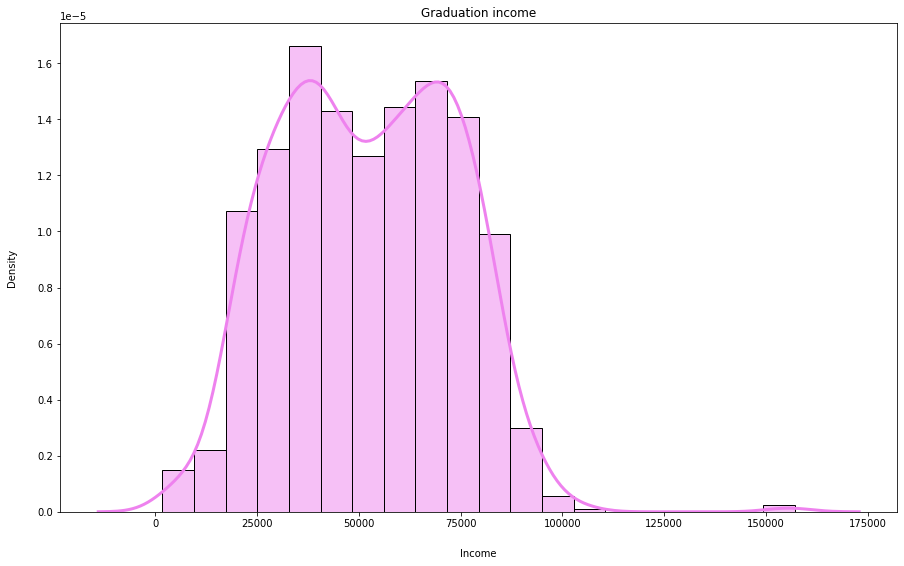

In [61]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    graduation_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "violet"
)

density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="violet")

plt.title("Graduation income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [23]:
graduation_data = graduation_data[graduation_data.Income < 600000]

In [24]:
mean_income = graduation_data.Income.mean()
median_income = graduation_data.Income.median()
std_income = graduation_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52169.74977578475
Mediana: 51983.0
Standard deviation: 21354.316952362668


In [25]:
cycle_data = data.loc[data.Education== '2n Cycle']
cycle_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,39,2n Cycle,Alone,33812.0,133,1,0,2012-11-03,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,48,2n Cycle,Partner,23718.0,81,1,0,2013-09-02,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,28,2n Cycle,Partner,7500.0,122,0,0,2012-11-09,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,45,2n Cycle,Alone,88194.0,1274,0,1,2014-03-19,...,5,1,0,0,1,0,0,3,11,1
78,10401,1976,48,2n Cycle,Partner,26326.0,18,0,0,2013-09-04,...,3,0,0,0,0,0,1,3,11,0


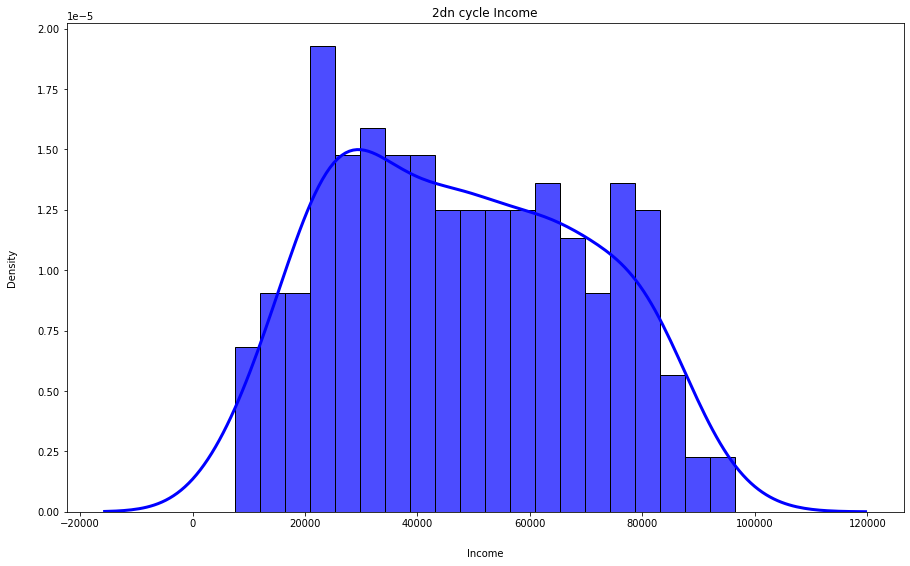

In [65]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    cycle_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.7,
    color = "blue"
)

density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="blue")

plt.title("2dn cycle Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [27]:
mean_income = cycle_data.Income.mean()
median_income = cycle_data.Income.median()
std_income = cycle_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 47625.333333333336
Mediana: 46805.0
Standard deviation: 22199.278285245826


In [28]:
master_data = data.loc[data.Education== 'Master']
master_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,57,Master,Partner,62513.0,716,0,1,2013-09-09,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,72,Master,Alone,59354.0,310,1,1,2013-11-15,...,6,0,0,0,0,0,0,3,11,0
18,6565,1949,75,Master,Partner,76995.0,1782,0,1,2013-03-28,...,5,0,0,0,1,0,0,3,11,0
30,6864,1989,35,Master,Alone,10979.0,30,0,0,2014-05-22,...,5,0,0,0,0,0,0,3,11,0
31,3033,1963,61,Master,Partner,38620.0,318,0,0,2013-05-11,...,3,0,0,0,0,0,0,3,11,0


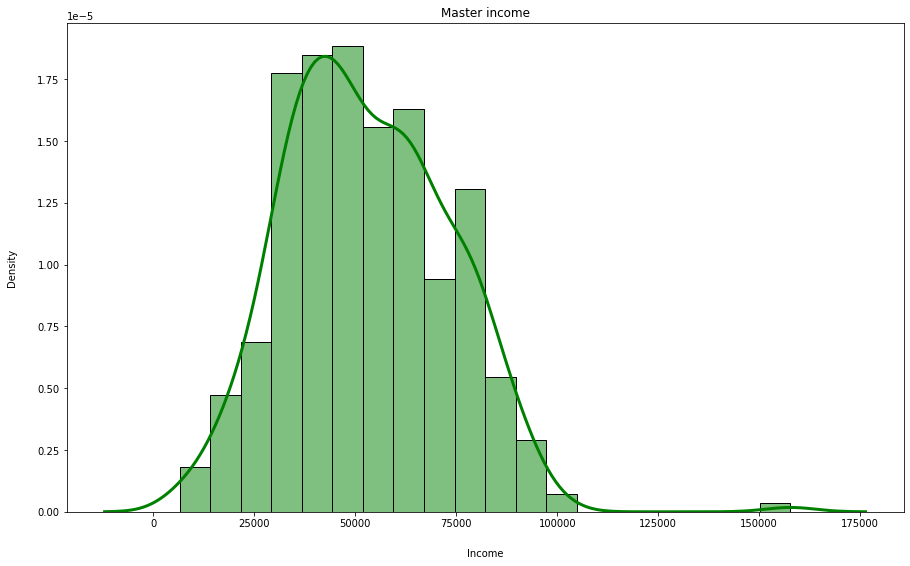

In [66]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    master_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="green")

plt.title("Master income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [30]:
mean_income = master_data.Income.mean()
median_income = master_data.Income.median()
std_income = master_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52917.53424657534
Mediana: 50943.0
Standard deviation: 20157.78802913486


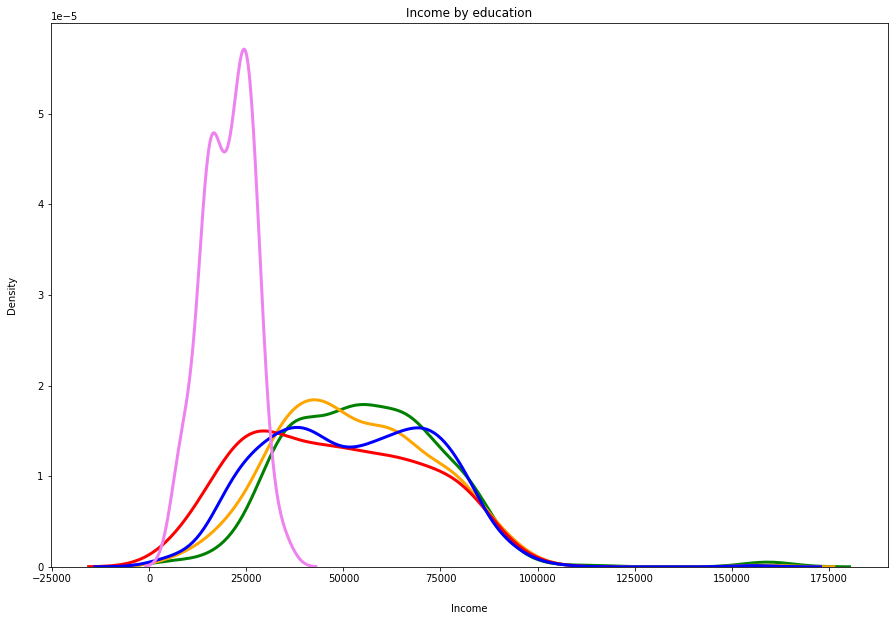

In [67]:
plt.figure(figsize=(15,10))

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="green")
density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="orange")
density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="red")
density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="blue")
density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="violet")

plt.title("Income by education")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

#ciao